## Does the Indian stock market react to the transition risk of climate change?

Through this project, we intend to analyze the reaction of the Indian stock market to global climate-related conferences and news. We have used a **top-down approach** to study the same. Starting from the impact on the overall stock market indices, we break it down further by studying the major industry drivers of that impact through an economic analysis. 

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#For visualizations
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

In [232]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

##### We focus on the most significant climate-related events that took place between the period of 2011 and 2022.
The significance of the COPs was decided on the basis of the negotiations that went on in that particular conference and whether the nations were successful in coming to a common consensus on its objectives. Additionally, the US withdrawal decision from the Paris Agreement has been considered as it altered the potential impact of the previously ratified agreement.

In [333]:
climate_treaties = pn.widgets.RadioButtonGroup(name='policy', 
                                    options=['COP17','COP18','COP19','COP21','COP22',
                                                            'US Paris Agreement Withdrawal Announcement','COP23',
                                                            'COP25','COP26','COP27'],
                                    button_type='success')

Here, we define the period of study for each treaty, including a window of 15 days before and after the conference. This has been done to study the impact of that particular treaty on the stock market given the anticipated result of the event.

In [334]:
policy_dict = {"COP17": ["2011-11-10","2011-12-31"],
               "COP18": ["2012-11-10","2012-12-25"],
               "COP19": ["2013-10-26","2013-12-08"],
               "COP21": ["2015-11-15","2015-12-27"],
               "COP22": ["2016-10-22","2016-12-04"],
               "US Paris Agreement Withdrawal Announcement": ["2017-05-20","2017-06-10"],
               "COP23": ["2017-10-21","2017-12-03"],
               "COP25": ["2019-11-17","2019-12-28"],
               "COP26": ["2021-10-16","2021-11-28"],
               "COP27": ["2022-10-20","2022-12-05"]}

To analyse the impact of different treaties on the Indian stock market, you can select any particular event from the given options and run the subsequent commands.

In [412]:
climate_treaties

RadioButtonGroup(button_type='success', name='policy', options=['COP17', 'COP18', ...], value='COP19')

In [413]:
climate_treaties.value

'COP19'

We web scrape data from Yahoo Finance to extract stock market information for the relevant period  and feed those dates to study the i.

In [6]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [414]:
SES_data = pdr.get_data_yahoo(['^BSESN'], start=policy_dict[climate_treaties.value][0], end=policy_dict[climate_treaties.value][1])

[*********************100%%**********************]  1 of 1 completed


In [415]:
SES_data['Adj Close'].isnull().sum()

0

In [417]:
SES_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-28,20696.509766,20771.359375,20550.640625,20570.279297,20570.279297,8100
2013-10-29,20593.490234,20952.550781,20493.660156,20929.009766,20929.009766,11300
2013-10-30,20944.140625,21086.589844,20937.119141,21033.970703,21033.970703,10400
2013-10-31,21000.599609,21205.439453,20991.980469,21164.519531,21164.519531,11900
2013-11-01,21158.810547,21293.880859,21141.320312,21196.810547,21196.810547,10000


In [418]:
NIF_data = pdr.get_data_yahoo(['^NSEI'], start=policy_dict[climate_treaties.value][0], end=policy_dict[climate_treaties.value][1])

[*********************100%%**********************]  1 of 1 completed


In [420]:
NIF_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-28,6155.100098,6168.750000,6094.100098,6101.100098,6101.100098,146300
2013-10-29,6107.549805,6228.049805,6079.200195,6220.899902,6220.899902,197300
2013-10-30,6230.799805,6269.200195,6222.600098,6251.700195,6251.700195,177600
2013-10-31,6237.149902,6309.049805,6235.899902,6299.149902,6299.149902,239600
2013-11-01,6289.750000,6332.600098,6286.950195,6307.200195,6307.200195,191600


To assess the economy-wide impact of a particular treaty, we study the **daily adjusted closing price** as our dependent variable, for both, NIFTY and SENSEX data.

In [421]:
SES_prices = DataFrame(SES_data['Adj Close'])
NIF_prices = DataFrame(NIF_data['Adj Close'])
prices_policy = pd.concat([SES_prices, NIF_prices], axis=1)
prices_policy.columns = ['SENSEX', 'NIFTY50']
prices_policy.fillna(prices_policy.mean(), inplace=True)
prices_policy.head()

,SENSEX,NIFTY50
Date,,
2013-10-28,20570.279297,6101.100098
2013-10-29,20929.009766,6220.899902
2013-10-30,21033.970703,6251.700195
2013-10-31,21164.519531,6299.149902
2013-11-01,21196.810547,6307.200195


The shift in mood as a result of the negotiated outcome of a conference is best expressed by the partipants' demand-supply behaviour as reflected by the **ajusted closing price**.

In [ ]:
plot = sns.lineplot(prices_policy['SENSEX'], legend=True)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.grid(False)
plot.right_ax.grid(False)

Now, to look at the major industries driving these trends, we study the effect of the conferences on the oil exploration industry which is likely to be largely impacted by a climate-related nevent. And to further this analysis, we identify the complements of the oil exploration industry as oil refineries, gas distribution and its substitute as the renewable energy sector. 

In [294]:
#Complements
oilexp = ['ONGC.BO','PETRONET.NS','RELIANCE.NS']
oilref = ['BPCL.NS','HINDPETRO.NS','CHENNPETRO.NS']
gasdist = ['GAIL.NS','REFEX.NS']
stock_dict = {'oilexp': oilexp,'oilref': oilref,'gasdist': gasdist}
stocks_df = DataFrame()
compind_df_clt = DataFrame()

for cat_name in stock_dict.keys():
    stk_l = []
    for stock in stock_dict[cat_name]:
        stocks_df[stock.replace('.','')] = pdr.get_data_yahoo(stock, start=policy_dict[dates.value][0], end=policy_dict[dates.value][1])['Adj Close']
        stock_n = stock.replace('.','')
        stk_l.append(stock_n)
    compind_df_clt.index = stocks_df.index
    compind_df_clt[str(cat_name) + '_mean'] = stocks_df[stk_l].mean(axis=1).values.tolist()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [295]:
compind_df_clt.head()

,oilexp_mean,oilref_mean,gasdist_mean
Date,,,
2017-05-22,324.262934,290.635880,47.031994
2017-05-23,318.317215,284.439982,46.124352
2017-05-24,316.950155,287.100520,46.832365
2017-05-25,318.439896,292.617391,47.691232
2017-05-26,326.048879,309.464132,47.958694


In [296]:
stocks_df.head()

,ONGCBO,PETRONETNS,RELIANCENS,BPCLNS,HINDPETRONS,CHENNPETRONS,GAILNS,REFEXNS
Date,,,,,,,,
2017-05-22,168.673416,169.209991,634.905396,321.755310,235.796371,314.355957,75.766632,18.297356
2017-05-23,166.009659,162.954987,625.987000,323.582367,230.693970,299.043610,73.854019,18.394684
2017-05-24,165.058319,163.569000,622.223145,329.295013,230.740158,301.266388,75.854004,17.810726
2017-05-25,165.676682,165.142334,624.500671,336.210205,234.942200,306.699768,77.863716,17.518747
2017-05-26,167.246414,169.689651,641.210571,346.756500,262.093475,319.542419,78.009338,17.908051


In [441]:
stock_rets_clt = compind_df_clt.pct_change()

To establish that the industries stated above are complements to the oil exploration industry, we construct a **pair plot** and a **correlation heatmap** that confirms this.

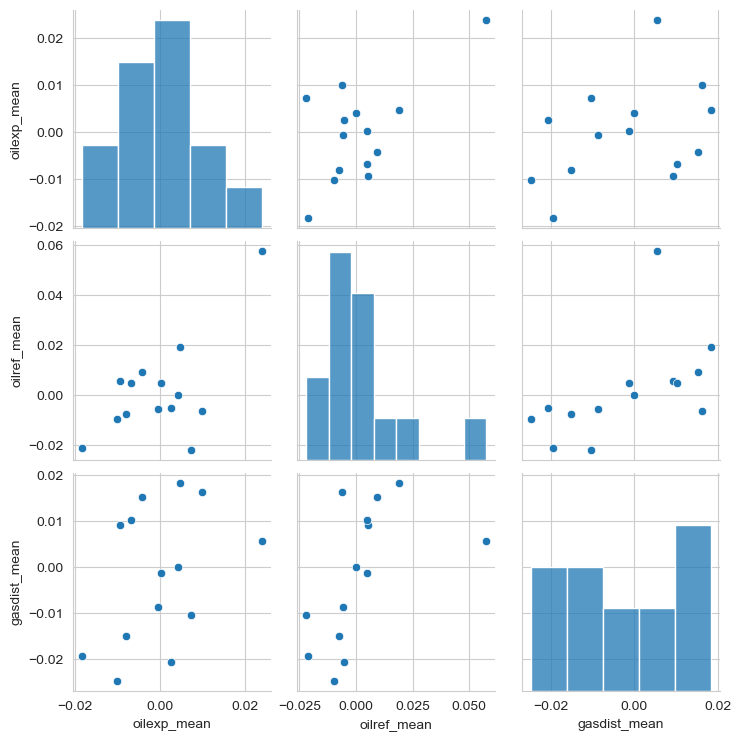

In [298]:
sns.pairplot(stock_rets_clt.dropna())

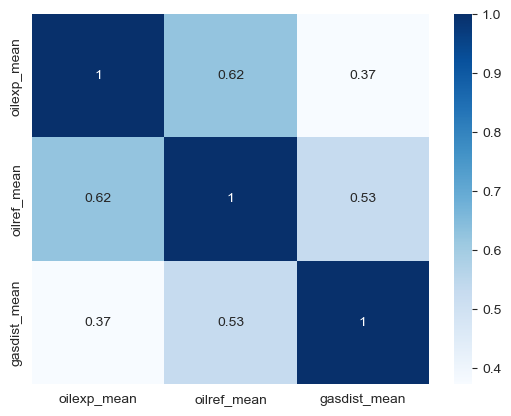

In [299]:
dataplot = sns.heatmap(stock_rets_clt.corr(), cmap="Blues", annot=True)
plt.show()
#sns.corrplot(stock_rets.dropna(),annot=True)

Having established the relationships between different industries, we plot the impact of the treaties on the respective industries.

In [292]:
rets_policy = prices_policy.pct_change()
rets_policy.head()

,SENSEX,NIFTY50
Date,,
2017-05-22,NaN,NaN
2017-05-23,-0.006729,-0.005520
2017-05-24,-0.002095,-0.002727
2017-05-25,0.014798,0.015939
2017-05-26,0.009047,0.008975


In [416]:
SES_idata = SES_data.interactive()

In [454]:
NIF_idata = hvplot.bind(NIF_data,climate_treaties).interactive()

TypeError: 'DataFrame' object is not callable

In [422]:
sensex_pipeline = SES_idata['Adj Close'].to_frame()

In [423]:
nifty_pipeline = NIF_idata['Adj Close'].to_frame()

In [424]:
sensex_pipeline.head()

In [425]:
nifty_pipeline.head()

In [452]:
#sensex_plot = sensex_pipeline.hvplot(x='Date', by ='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
p1 = sensex_pipeline.hvplot(kind = 'line', xlim=(climate_treaties.value[0],climate_treaties.value[1]))
#p2 = nifty_pipeline.hvplot(kind = 'line')
p1

In [427]:
p1

In [428]:
p2

In [442]:
df.hvplot.heatmap(x='oilexp_mean', y='oilref_mean', C='temperature', 
stock_rets_clt = stock_rets_clt.dropna().reset_index(drop=True)
stock_rets_clt_int = stock_rets_clt.interactive()

In [449]:
int_plot = stock_rets_clt_int.hvplot.heatmap(cmap="Blues")
int_plot

In [443]:
stock_rets_clt.head()

,oilexp_mean,oilref_mean,gasdist_mean
0,NaN,NaN,NaN
1,-0.018336,-0.021318,-0.019298
2,-0.004295,0.009354,0.015350
3,0.004700,0.019216,0.018339
4,0.023895,0.057573,0.005608


In [453]:
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("#CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.Markdown("## Settings")],
    main=[pn.Row(pn.Column(climate_treaties, 
                           p1.panel(width=700), margin=(0,25)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
template.show()
#template.servable();

Launching server at http://localhost:50175
